# LGMVIP
# Name - Amit Tomar
# Designation - Data Science Intern.

In [1]:
#Import Desired Libraray.
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns 
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder

In [2]:
# Reading the Dataset.
iris=pd.read_csv('iris.csv')

In [3]:
# To view the Top 5 Datapoints of the Dataset.
iris.head()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [4]:
# To view the last 5 Datapoints of the dataset
iris.tail()

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width,Species
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica
149,5.9,3.0,5.1,1.8,virginica


In [5]:
# To determine the shape of the dataset.
iris.shape

(150, 5)

In [6]:
# To determine the information of the Dataset.
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal.Length  150 non-null    float64
 1   Sepal.Width   150 non-null    float64
 2   Petal.Length  150 non-null    float64
 3   Petal.Width   150 non-null    float64
 4   Species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [7]:
# To check weather the dataset have some null value or not.
iris.isnull().sum()

Sepal.Length    0
Sepal.Width     0
Petal.Length    0
Petal.Width     0
Species         0
dtype: int64

In [8]:
# To counts the Species in the Dataset.
iris['Species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: Species, dtype: int64

In [9]:
# to find the Correlation in the dataset.
iris_correlation=iris.corr()
iris_correlation

,Sepal.Length,Sepal.Width,Petal.Length,Petal.Width
Sepal.Length,1.000000,-0.117570,0.871754,0.817941
Sepal.Width,-0.117570,1.000000,-0.428440,-0.366126
Petal.Length,0.871754,-0.428440,1.000000,0.962865
Petal.Width,0.817941,-0.366126,0.962865,1.000000


Here + sign shows the Positive Correlation.
Here - sign shows the Negative Correlation.

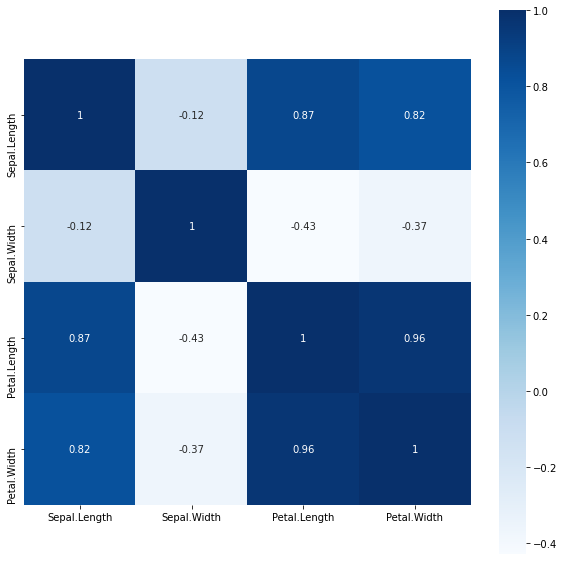

In [10]:
#To visualise the Correlation of the Dataset.
plt.figure(figsize=(10,10))
sns.heatmap(iris_correlation,cbar=True,annot=True,cmap='Blues',square=True)
plt.show()

# Encoding the Data.

In [11]:
# Assigning the LabelEncoder to the variable
le=LabelEncoder()

In [12]:
# Transforming the data from words to numbers 
labels=le.fit_transform(iris.Species)

In [13]:
# Puttting the Data to dataset.
iris['Species']=labels

In [14]:
# Now check the values.
iris['Species'].value_counts()

0    50
1    50
2    50
Name: Species, dtype: int64

As on comparision we now see that :
    0 = virginica
    1 = versicolor
    2 = setosa

# Train The Data

In [15]:
# Now Assigning the independent and dependent variable.
x=iris.drop('Species',axis=1)
y=iris['Species']

In [16]:
# Splitting the Dataset.
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2 ,random_state=2)

In [17]:
# Assiging the Variable to LogisticRegression
lr=LogisticRegression()

In [18]:
# Training the Model
iris_train=lr.fit(x_train,y_train)

# Prediction

In [19]:
#predicting the training model Data
iris_pred_train=lr.predict(x_train)

In [20]:
#predicting the testing model data
iris_pred_test=lr.predict(x_test)

# Evaluation

In [21]:
#Evaluating the train data
score_eval_train=accuracy_score(iris_pred_train,y_train)
score_eval_train

0.975

In [22]:
# Evaluating the Test data
score_eval_test=accuracy_score(iris_pred_test,y_test)
score_eval_test


0.9666666666666667

In [23]:
#view the percentile form of the accuracy.
Score_train=(score_eval_train*100)
Score_train

97.5

In [24]:
#view the percentile form of the accuracy.
score_test=(score_eval_test*100)
score_test

96.66666666666667

# Graphical Representation Of Accuracy

In [25]:
# Making the DataFrame for the Accuracy of model
iris_score=pd.DataFrame({'Evaluation':['Score_Eval_Train','Score_Eval_Test'],'Accuracy Value':[Score_train,score_test]},index=[0,1])

In [26]:
# Showing the Accuracy of the model in the Dataset.
iris_score

,Evaluation,Accuracy Value
0,Score_Eval_Train,97.500000
1,Score_Eval_Test,96.666667


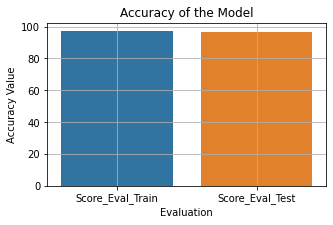

In [27]:
# Representing the Accuracy of the Model used.
plt.figure(figsize=(5,3))
sns.barplot(x='Evaluation',y='Accuracy Value',data=iris_score)
plt.title("Accuracy of the Model")
plt.grid()
plt.show()